# Data Collection

In [1]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 KB 3.5 MB/s eta 0:00:00


In [2]:
import praw

In [3]:
redditApi = praw.Reddit(client_id = 'Tc_MOdA4g5Kc1x5_krKujQ',
                        client_secret = 'Vpqq2vxJpqcVk_pUJjiCJ9-qbfXAqw',
                        user_agent = 'jingtingxu')

In [4]:
subreddit = "ChatGPT"
breadthCommentCount = 10
targetSub = redditApi.subreddit(subreddit)

In [5]:
# Print the title of the subreddit
print(f"Title of the subreddit: {targetSub.title}\n")

# Get the top 10 hot posts from the subreddit
hot_posts = targetSub.hot(limit=breadthCommentCount)

# Print the title, score, and author of each post
for post in hot_posts:
    print(f"Title: {post.title}\nScore: {post.score}\nAuthor: {post.author}\n")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title of the subreddit: ChatGPT

Title: Second-Wave ChatGPT-plus Giveaway & FlowGPT $5000 Prompt Hackathon & First-Wave Winner Announcement
Score: 12
Author: flowGPT

Title: r/ChatGPT's FAQ Thread
Score: 620
Author: LinuxLover3113

Title: Chat GPT will change Washington, D.C.
Score: 3983
Author: GuerrillaSteve

Title: ASCII art: Mona Lisa’s smile
Score: 1471
Author: Dominique0001

Title: I'm gonna cry
Score: 3094
Author: blahblahsnahdah

Title: I convinced chatGPT i was from the future: ChatGPT's decision to take a physical form
Score: 382
Author: Crypto-Noob20

Title: Using ChatGPT (GPT-4) to find lost media by generating Google search terms
Score: 603
Author: ChiaraStellata

Title: How do I stay at the forefront of chatGPT?
Score: 363
Author: MilfLoverUniverse

Title: The collective knowledge of all humanity is available via AI
Score: 232
Author: TechSquidTV

Title: I only need chatGPT and Image Generator for my small online store now
Score: 373
Author: Typical-Art-1448



# Graph Creation

In [6]:
!pip install networkx --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [7]:
import networkx as nx

In [8]:
g = nx.Graph()

In [9]:
def recursive_node_adder(g, comment, parent_author):
    '''Recursively process comments and add them to the graph'''
    
    # Check if the comment has an author
    if comment.author is not None:
        # Check if we have the node already in our graph
        if comment.author not in g.nodes:
            g.add_node(comment.author)
        # Create an edge between this comment author and the parent author
        g.add_edge(comment.author, parent_author)
        # Iterate through the replies
        for reply in comment.replies.list():
            if isinstance(reply, praw.models.MoreComments):
                continue
            # Recursively process this reply
            recursive_node_adder(g, reply, comment.author)

# Create an undirected graph
submissions = targetSub.hot(limit=20)
for post in submissions:
    print(post.author, "-", post.title)
    # Check if we have the node already in our graph
    if post.author not in g.nodes:
        g.add_node(post.author)
    post.comment_limit = breadthCommentCount
    # Get the top few comments
    for comment in post.comments.list():
        # Skip MoreComment objects, which don't have authors
        if isinstance(comment, praw.models.MoreComments):
            continue
        # Recursively process this reply
        recursive_node_adder(g, comment, post.author)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



flowGPT - Second-Wave ChatGPT-plus Giveaway & FlowGPT $5000 Prompt Hackathon & First-Wave Winner Announcement
LinuxLover3113 - r/ChatGPT's FAQ Thread


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



GuerrillaSteve - Chat GPT will change Washington, D.C.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Dominique0001 - ASCII art: Mona Lisa’s smile
blahblahsnahdah - I'm gonna cry


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Crypto-Noob20 - I convinced chatGPT i was from the future: ChatGPT's decision to take a physical form


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



ChiaraStellata - Using ChatGPT (GPT-4) to find lost media by generating Google search terms
MilfLoverUniverse - How do I stay at the forefront of chatGPT?


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



TechSquidTV - The collective knowledge of all humanity is available via AI
Typical-Art-1448 - I only need chatGPT and Image Generator for my small online store now


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



DjSapsan - Exposing pre-prompt
hideousox - How are you using chatgpt at work ?


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



SCMC54 - Jesus... it did everything, like actually everything


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



TheChaos7777 - Bing can be extremely irritating
kamiland - It took a few tries


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



SomeRandomGuy33 - 🐢 all the way down.
Individual_Koala3928 - The implementation of Bing is the wrong way to use GPT


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Aglavra - Remember: This is a Mirror, Not a Window
info_games - As an AI model language 🤓


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



LuckySh1t - I love what this can do


# Graph Analysis

In [10]:
print(nx.number_of_nodes(g))  # prints the number of nodes in the graph
print(nx.number_of_edges(g))  # prints the number of edges in the graph
print(nx.density(g))  # prints the density of the graph

159
250
0.01990287397500199


In [ ]:
print("Nodes:")
for node in g.nodes():
    print("\tNode:", node)
    
print("Edges:")
for edge in g.edges():
    print("\tEdge:", edge)

Nodes:
	Node: flowGPT
	Node: CHAD-GPT
	Node: ikmalsaid
	Node: Xindong
	Node: pancomido
	Node: mahindra27
	Node: starwaver
	Node: JackCWells
	Node: Technical-Outside408
	Node: alaphant42
	Node: SoManyTabs
	Node: LinuxLover3113
	Node: HOLUPREDICTIONS
	Node: Any-Smile-5341
	Node: slackermanz
	Node: joshuamck
	Node: MineAndCraft12
	Node: techno-peasant
	Node: ara9ond
	Node: dtutubalin
	Node: AutoModerator
	Node: PTwolfy
	Node: Sad-Performance2893
	Node: porkypinepower
	Node: jeweliegb
	Node: bb_player
	Node: EnchantedEve2004
	Node: vinayak_117
	Node: oodelay
	Node: Summer-dust
	Node: Wesituatiotgu
	Node: -MobCat-
	Node: Janus_The_Great
	Node: Stan_Izoniti
	Node: genYsuperstar
	Node: darchangels13
	Node: strydar1
	Node: papsamir
	Node: EwaldvonKleist
	Node: WithoutReason1729
	Node: Prymu
	Node: Ok_Opportunity8008
	Node: timetogetjuiced
	Node: victortvalois
	Node: whoami9011
	Node: 1257919478
	Node: Affectionate_Sky2717
	Node: bobbejaans
	Node: Ransurian
	Node: GooseG17
	Node: psychoticarmad

In [11]:
# node_attribute_dict = {
#     0: {"label": "center"},
#     5: {"label": "important"}}
# # Set the attributes
# nx.set_node_attributes(g, node_attribute_dict)
# # If you just print the data node list, you don't see the associated attributes
# print("Nodes without data:")
# for node in g.nodes():
#     print("\tNode:", node)    
# # Need to use the data=True named argument
# print("Nodes w/ data:")
# for node in g.nodes(data=True):
#     print("\tNode:", node)

# # A dictionary with information for edges to which we will add attributes
# edge_attribute_dict = {
#     (0, 5): {"weight": 5},
#     (6, 5): {"weight": 2}} # Note order is irrelevant for undirected graph
# # Set the attributes
# nx.set_edge_attributes(g, edge_attribute_dict)
# # If you just print the data node list, you don't see the associated attributes
# print("Edges without data:")
# for e in g.edges():
#     print("\tEdge:", e)
# # Need to use the data=True named argument
# print("Edges w/ data:")
# for e in g.edges(data=True):
#     print("\tEdge:", e)

In [ ]:
g.degree()

DegreeView({Redditor(name='flowGPT'): 10, Redditor(name='CHAD-GPT'): 1, Redditor(name='ikmalsaid'): 1, Redditor(name='Xindong'): 1, Redditor(name='pancomido'): 1, Redditor(name='mahindra27'): 1, Redditor(name='starwaver'): 1, Redditor(name='JackCWells'): 1, Redditor(name='Technical-Outside408'): 1, Redditor(name='alaphant42'): 1, Redditor(name='SoManyTabs'): 1, Redditor(name='LinuxLover3113'): 9, Redditor(name='HOLUPREDICTIONS'): 5, Redditor(name='Any-Smile-5341'): 2, Redditor(name='slackermanz'): 1, Redditor(name='joshuamck'): 3, Redditor(name='MineAndCraft12'): 1, Redditor(name='techno-peasant'): 1, Redditor(name='ara9ond'): 1, Redditor(name='dtutubalin'): 9, Redditor(name='AutoModerator'): 15, Redditor(name='PTwolfy'): 1, Redditor(name='Sad-Performance2893'): 2, Redditor(name='porkypinepower'): 2, Redditor(name='jeweliegb'): 1, Redditor(name='bb_player'): 1, Redditor(name='EnchantedEve2004'): 1, Redditor(name='vinayak_117'): 10, Redditor(name='oodelay'): 3, Redditor(name='Summer-dus

In [12]:
print("Global Coefficient:", nx.transitivity(g))

Global Coefficient: 0.32547169811320753


In [13]:
centrality = nx.degree_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='AutoModerator'), 0.11392405063291139),
 (Redditor(name='Dominique0001'), 0.06962025316455696),
 (Redditor(name='Aglavra'), 0.06962025316455696),
 (Redditor(name='MilfLoverUniverse'), 0.06962025316455696),
 (Redditor(name='Typical-Art-1448'), 0.06962025316455696),
 (Redditor(name='SomeRandomGuy33'), 0.06962025316455696),
 (Redditor(name='GuerrillaSteve'), 0.06329113924050633),
 (Redditor(name='blahblahsnahdah'), 0.06329113924050633),
 (Redditor(name='hideousox'), 0.06329113924050633),
 (Redditor(name='SCMC54'), 0.06329113924050633),
 (Redditor(name='flowGPT'), 0.056962025316455694),
 (Redditor(name='LinuxLover3113'), 0.056962025316455694),
 (Redditor(name='Crypto-Noob20'), 0.056962025316455694),
 (Redditor(name='ChiaraStellata'), 0.056962025316455694),
 (Redditor(name='DjSapsan'), 0.056962025316455694),
 (Redditor(name='TheChaos7777'), 0.056962025316455694),
 (Redditor(name='kamiland'), 0.056962025316455694),
 (Redditor(name='Individual_Koala3928'), 0.056962025316455694

In [14]:
centrality = nx.closeness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='AutoModerator'), 0.4734756981350855),
 (Redditor(name='ChiaraStellata'), 0.32731037707491395),
 (Redditor(name='Aglavra'), 0.32731037707491395),
 (Redditor(name='kamiland'), 0.3264490339773484),
 (Redditor(name='GuerrillaSteve'), 0.32389199193575036),
 (Redditor(name='blahblahsnahdah'), 0.32389199193575036),
 (Redditor(name='DjSapsan'), 0.32389199193575036),
 (Redditor(name='hideousox'), 0.32389199193575036),
 (Redditor(name='SomeRandomGuy33'), 0.32304852320675104),
 (Redditor(name='Dominique0001'), 0.32220943613348674),
 (Redditor(name='MilfLoverUniverse'), 0.32220943613348674),
 (Redditor(name='Typical-Art-1448'), 0.32220943613348674),
 (Redditor(name='SCMC54'), 0.32054427108886924),
 (Redditor(name='Crypto-Noob20'), 0.31889622856399075),
 (Redditor(name='TechSquidTV'), 0.31889622856399075),
 (Redditor(name='TheChaos7777'), 0.31889622856399075),
 (Redditor(name='Individual_Koala3928'), 0.31889622856399075),
 (Redditor(name='LuckySh1t'), 0.31726504580918774),
 (Reddit

In [15]:
centrality = nx.betweenness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='AutoModerator'), 0.7249321400736382),
 (Redditor(name='blahblahsnahdah'), 0.09787954527130532),
 (Redditor(name='hideousox'), 0.09771829396113843),
 (Redditor(name='GuerrillaSteve'), 0.09195355962267193),
 (Redditor(name='Dominique0001'), 0.08711602031766508),
 (Redditor(name='Typical-Art-1448'), 0.08671289204224784),
 (Redditor(name='MilfLoverUniverse'), 0.08139159880674031),
 (Redditor(name='DjSapsan'), 0.08135128597919858),
 (Redditor(name='kamiland'), 0.0808675320486979),
 (Redditor(name='SomeRandomGuy33'), 0.0773200032250262),
 (Redditor(name='SCMC54'), 0.07651374667419172),
 (Redditor(name='ChiaraStellata'), 0.07643312101910828),
 (Redditor(name='Aglavra'), 0.0756268644682738),
 (Redditor(name='Crypto-Noob20'), 0.06603241151334355),
 (Redditor(name='Individual_Koala3928'), 0.06566959606546803),
 (Redditor(name='LuckySh1t'), 0.055147948077078124),
 (Redditor(name='TheChaos7777'), 0.05246042624096321),
 (Redditor(name='TechSquidTV'), 0.049141336773361285),
 (Reddit

In [19]:
nx.set_node_attributes(g, centrality, "centrality")
print("Nodes:")
for node in g.nodes(data=True):
  print("\tNode:", node)

Nodes:
	Node: (Redditor(name='flowGPT'), {'centrality': 0.0027412722728372167})
	Node: (Redditor(name='CHAD-GPT'), {'centrality': 0.0})
	Node: (Redditor(name='biCplUk'), {'centrality': 0.0})
	Node: (Redditor(name='Pengking36'), {'centrality': 0.0})
	Node: (Redditor(name='lifehasfuckedmeup'), {'centrality': 0.0})
	Node: (Redditor(name='dnszero'), {'centrality': 0.0})
	Node: (Redditor(name='Calm_Phase_9717'), {'centrality': 0.0})
	Node: (Redditor(name='LearnerAchiever'), {'centrality': 0.0})
	Node: (Redditor(name='WithoutReason1729'), {'centrality': 0.0})
	Node: (Redditor(name='cxd32'), {'centrality': 0.0})
	Node: (Redditor(name='LinuxLover3113'), {'centrality': 0.001612513101668951})
	Node: (Redditor(name='HOLUPREDICTIONS'), {'centrality': 0.0})
	Node: (Redditor(name='Any-Smile-5341'), {'centrality': 0.0})
	Node: (Redditor(name='slackermanz'), {'centrality': 0.0})
	Node: (Redditor(name='joshuamck'), {'centrality': 0.0})
	Node: (Redditor(name='MineAndCraft12'), {'centrality': 0.0})
	Node

# Graph Visualization

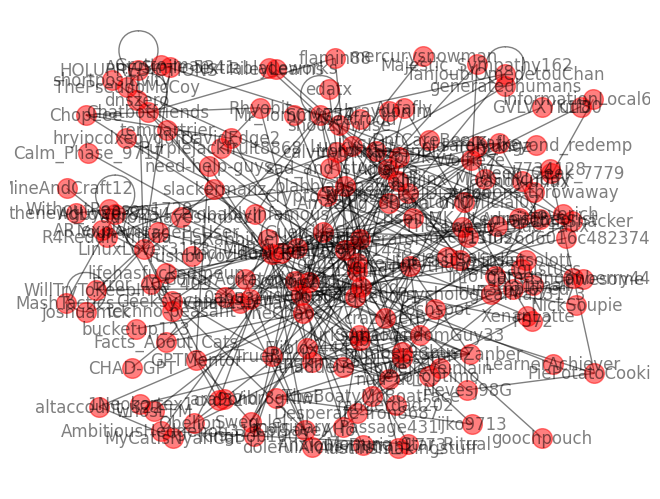

In [16]:
import matplotlib.pyplot as plt
# Use the Spring layout algorithm
pos = nx.spring_layout(g, scale=200, iterations=5, k=0.2)
# And draw the graph with node labels
nx.draw(g, pos, node_color='red', width=1, with_labels=True, node_size=200, alpha = 0.5)

## Now label only the top 10 nodes based on centrality and plot them 



In [41]:
# Extract the centrality values from the nodes
centrality_values = nx.get_node_attributes(g, 'centrality')

In [22]:
# Sort nodes based on centrality, in descending order
sorted_nodes = sorted(centrality_values.items(), key=lambda x: x[1], reverse=True)

# Retrieve the labels of the top 10 nodes
top_10_labels = [node[0] for node in sorted_nodes[:10]]
top_10_labels

[Redditor(name='AutoModerator'),
 Redditor(name='blahblahsnahdah'),
 Redditor(name='hideousox'),
 Redditor(name='GuerrillaSteve'),
 Redditor(name='Dominique0001'),
 Redditor(name='Typical-Art-1448'),
 Redditor(name='MilfLoverUniverse'),
 Redditor(name='DjSapsan'),
 Redditor(name='kamiland'),
 Redditor(name='SomeRandomGuy33')]

In [32]:
labels = {node: node if node in top_10_labels else '' for node in g.nodes()}

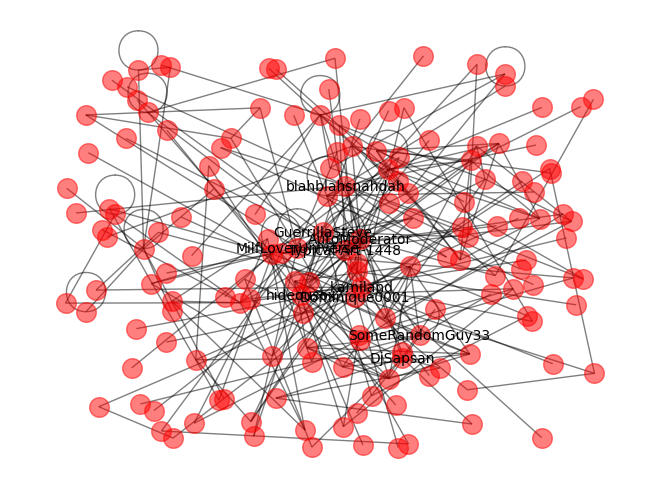

In [39]:
nx.draw(g, pos, width=1,  font_size=10, node_size=200, node_color='red', alpha = 0.5)
nx.draw_networkx_labels(g, pos, labels, font_size=10);

## Different visualization techniques 

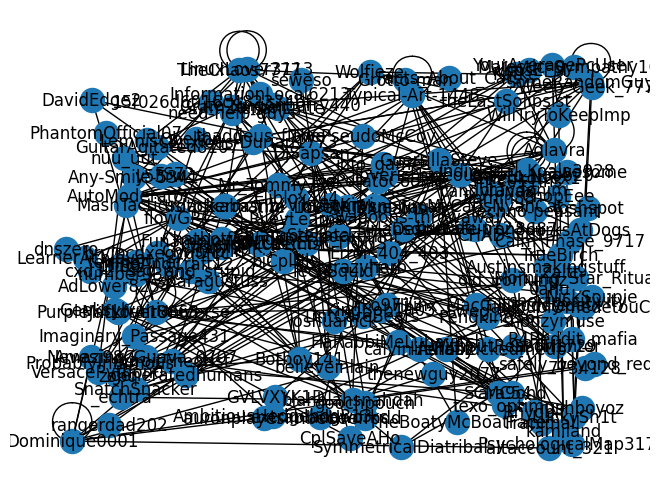

In [44]:
nx.draw_random(g, with_labels=True)
#  randomly positions nodes in the graph g and draws it with labels.

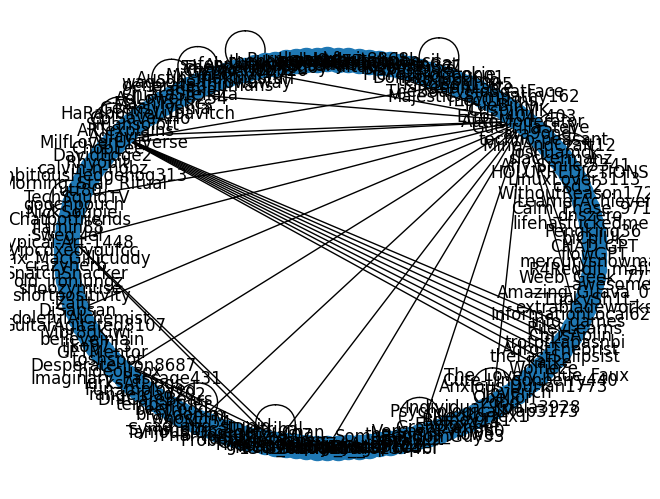

In [45]:
nx.draw_circular(g, with_labels=True)
#  positions nodes in a circle and draws the graph with labels.

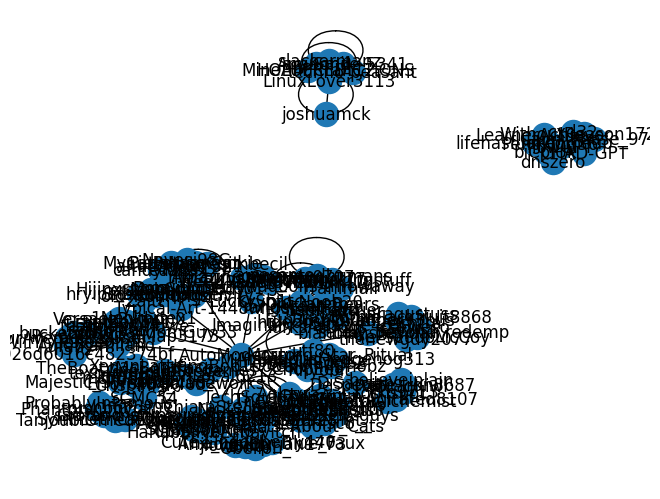

In [48]:
# Construct node positions using FR layout (as in Gephi)
node_positions = nx.fruchterman_reingold_layout(g)
# Draw with the given node positions specified
nx.draw(g, pos=node_positions, with_labels=True)


In [51]:
# !pip install python-louvain==0.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python-louvain==0.4 (from versions: 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16)
ERROR: No matching distribution found for python-louvain==0.4


Here we are detecting communities using the best_partition function from the community_louvain module. The nodes are colored according to their community assignments. 

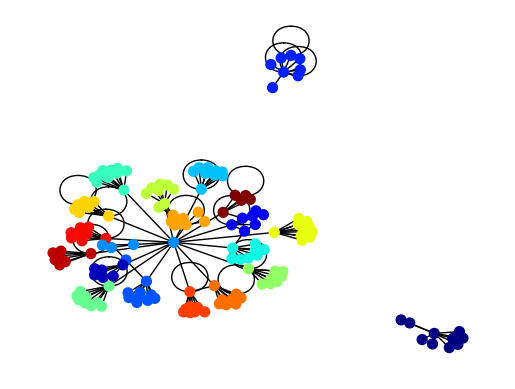

In [58]:
import community
from community.community_louvain import best_partition
parts = best_partition(g, resolution=5)
values = [parts.get(node) for node in g.nodes()]
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 50, with_labels = False)

Graphs are not superinformative now since we are working on a small subset of the graph. Later, we will detect the best way to visualize our graph. 